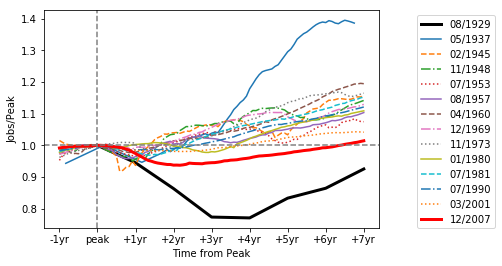

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

payment = pd.read_csv('/Users/Sophia/Desktop/BootCamp2017/Computation/Wk2_VisPandas/payems.csv', skiprows = 5)
dt = pd.to_datetime(payment.date)
for i in range(944):
    if dt[i] > datetime.now():
        dt[i] = datetime(dt[i].year - 100, dt[i].month, dt[i].day)
payment.index = dt
del payment['date']

peaks = [datetime(1929, 8, 1)
, datetime(1937, 5, 1)
, datetime(1945, 2, 1)
, datetime(1948, 11, 1)
, datetime(1953, 7, 1)
, datetime(1957, 8, 1)
, datetime(1960, 4, 1)
, datetime(1969, 12, 1)
, datetime(1973, 11, 1)
, datetime(1980, 1, 1)
, datetime(1981, 7, 1)
, datetime(1990, 7, 1)
, datetime(2001, 3, 1)
, datetime(2007, 12, 1)]

# Create segments and normalize
segments = []

# First deal with the two initial segments because they are irregualr
before1 = peaks[0].replace(year=peaks[0].year - 1)
after1 = peaks[0].replace(year=peaks[0].year + 7)
seg1 = payment[(payment.index >= before1) & (payment.index <= after1)]
seg1['payems'] = (seg1['payems']/31294)
seg1['order'] = range(12, 97, 12)
segments.append(seg1)

before2 = peaks[1].replace(year=peaks[1].year - 1)
after2 = peaks[2].replace(year=peaks[1].year + 7)
seg2 = payment[(payment.index >= before2) & (payment.index <= after2)]
seg2['payems'] = (seg2['payems']/30705)
seg2['order'] = [i for j in (range(2, 28, 12), range(32, 94)) for i in j]
segments.append(seg2)

# Deal with the other segments
    
for i in range (2,14):
    norm = float(payment.loc[[peaks[i]]].payems)
    before = peaks[i].replace(year=peaks[i].year - 1)
    after = peaks[i].replace(year=peaks[i].year + 7)
    seg = payment[(payment.index >= before) & (payment.index <= after)]
    seg['order'] = range(0, 97)
    seg['payems'] = seg['payems']/norm
    segments.append(seg)

from itertools import cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)
plt.figure()

i = 0
while i < 14:
    if i == 0:
        plt.plot(segments[i]['order'], segments[i]['payems'],"k", lw=3, label=str(peaks[0].strftime("%m/%Y")))
    elif i == 13:
        plt.plot(segments[i]['order'], segments[i]['payems'], "r", lw=3, label=str(peaks[13].strftime("%m/%Y")))
    else:
        plt.plot(segments[i]['order'], segments[i]['payems'],next(linecycler), label = str(peaks[i].strftime("%m/%Y")))
    i = i+1
    
# Legend
plt.legend(bbox_to_anchor=(1.1,1))

# Label
plt.xlabel("Time from Peak")
plt.ylabel("Jobs/Peak")
x = range(0, 97, 12)
labels = ["-1yr", "peak", "+1yr", "+2yr", "+3yr","+4yr","+5yr","+6yr","+7yr"]
plt.xticks(x, labels)

# Dashed lines
plt.axhline(1,linestyle='--',color="grey")
plt.axvline(12,linestyle='--',color="grey")


plt.show()


As seen from the plot, it seems that The Great Recession was the worst one ever in terms of job loss. Since the plot only shows job loss, there seems to be nothing with respect to which the other recessions are worse than The Great Recession.